In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
covid = pd.read_csv('us-counties.csv')

covid[(covid['state']=='Missouri') & (covid['county']=='Buchanan')]

,date,county,state,fips,cases,deaths
14961,2020-03-27,Buchanan,Missouri,29021.0,2,0
16795,2020-03-28,Buchanan,Missouri,29021.0,3,0
18729,2020-03-29,Buchanan,Missouri,29021.0,3,0
20766,2020-03-30,Buchanan,Missouri,29021.0,3,0
22902,2020-03-31,Buchanan,Missouri,29021.0,5,0
25097,2020-04-01,Buchanan,Missouri,29021.0,5,0
27353,2020-04-02,Buchanan,Missouri,29021.0,5,0
29670,2020-04-03,Buchanan,Missouri,29021.0,8,0
32051,2020-04-04,Buchanan,Missouri,29021.0,8,0
34482,2020-04-05,Buchanan,Missouri,29021.0,8,0


In [31]:
Miss = covid[covid['state']=='Missouri']

Miss['county'].unique()

Miss_March = Miss[Miss['date'].apply(lambda date: date.split('-')[1])=='03']

,date,county,state,fips,cases,deaths
706,2020-03-07,St. Louis,Missouri,29189.0,1,0
810,2020-03-08,St. Louis,Missouri,29189.0,1,0
934,2020-03-09,St. Louis,Missouri,29189.0,1,0
1084,2020-03-10,St. Louis,Missouri,29189.0,1,0
1266,2020-03-11,St. Louis,Missouri,29189.0,1,0
...,...,...,...,...,...,...
22958,2020-03-31,Taney,Missouri,29213.0,2,0
22959,2020-03-31,Unknown,Missouri,NaN,1,0
22960,2020-03-31,Warren,Missouri,29219.0,5,0
22961,2020-03-31,Webster,Missouri,29225.0,2,0


In [51]:
Miss_April1 = Miss[Miss['date']=='2020-04-01']

Miss1 = Miss_April1['cases']

Miss1.sum()

1430

In [59]:
Miss_April8 = Miss[Miss['date']=='2020-04-08']

Miss_April8.pivot_table(index = '')

,date,county,state,fips,cases,deaths
42001,2020-04-08,Adair,Missouri,29001.0,11,0
42002,2020-04-08,Atchison,Missouri,29005.0,1,0
42003,2020-04-08,Barry,Missouri,29009.0,2,0
42004,2020-04-08,Bates,Missouri,29013.0,4,0
42005,2020-04-08,Benton,Missouri,29015.0,3,0
...,...,...,...,...,...,...
42083,2020-04-08,Warren,Missouri,29219.0,13,0
42084,2020-04-08,Washington,Missouri,29221.0,1,0
42085,2020-04-08,Webster,Missouri,29225.0,3,0
42086,2020-04-08,Worth,Missouri,29227.0,1,0


In [62]:
mc = Miss.pivot_table(index = 'date', columns = 'county', values = 'cases').fillna(0)

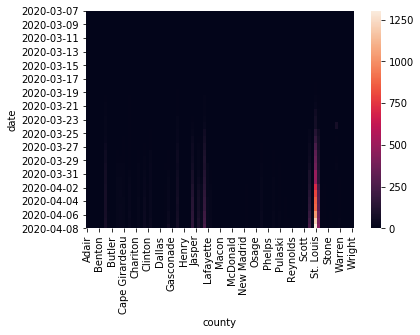

In [63]:
sns.heatmap(mc)

In [87]:
M = Miss[(Miss['date']=='2020-04-08') & (Miss['cases']>10)]

miss_cases10 = Miss[Miss['county'].isin(M['county'].unique())]

m10 = miss_cases10.pivot_table(index = 'date', columns = 'county', values = 'cases').fillna(0)

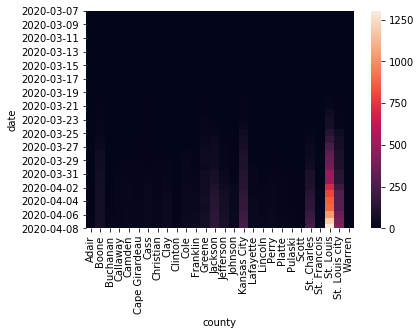

In [97]:
sns.heatmap(m10, xticklabels = M['county'].unique())

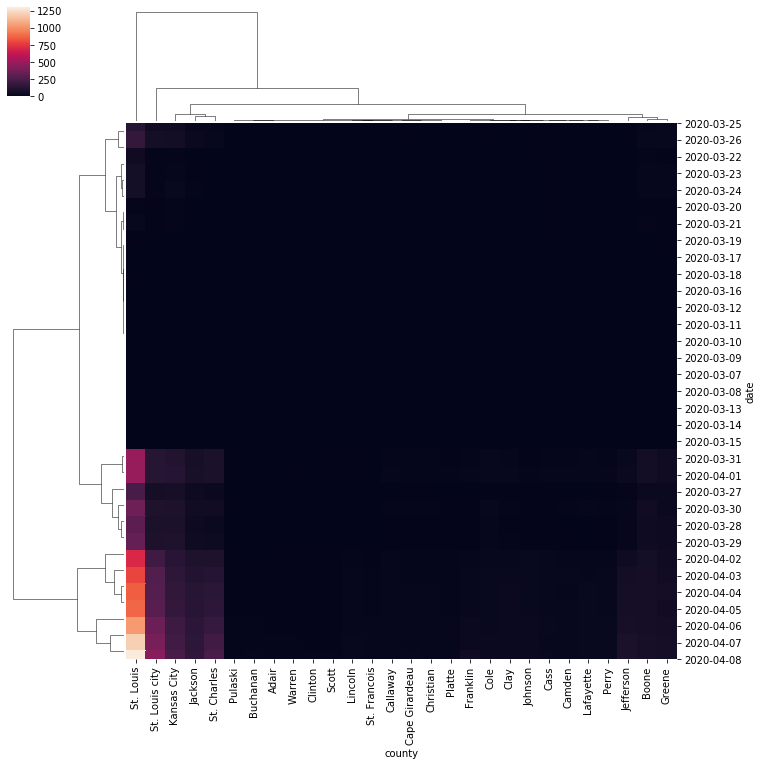

In [95]:
sns.clustermap(m10, figsize = (12,12))

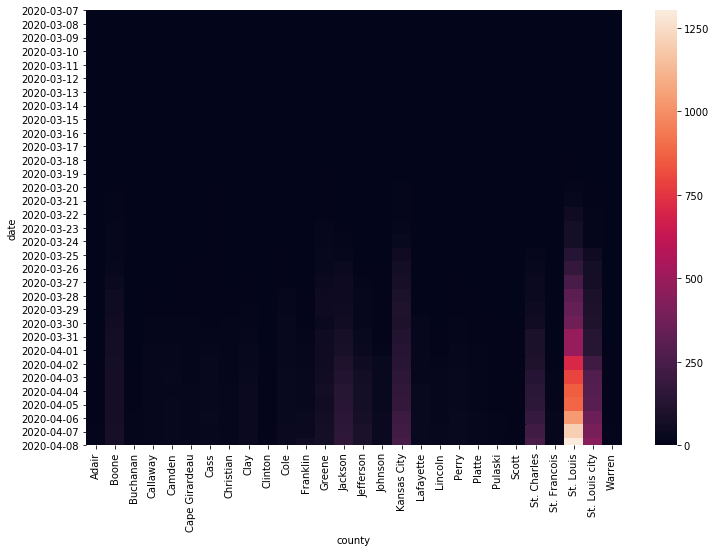

In [103]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(m10, xticklabels = M['county'].unique())